   #                   DATA ANALYTICS ON GOOGLE PLAY STORE


1. Google Play Store apps and reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

i- apps.csv:  contains all the details of the applications on Google Play. There are 13 features that describe a given app.

ii-  user_reviews.csv: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.
Let's take overview of data.

In [32]:
#importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the app dataset

In [3]:
app= pd.read_csv("google_play_apps.csv")
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [5]:
app= app.drop_duplicates()
app

,Id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
print("the total number of apps in the data set ",app['App'].count())

the total number of apps in the data set  9659


# 2 Data Cleaning

The four features that we will be working with most frequently henceforth are [Installs], [Size], [Rating] and [Price]. The info() function (from the previous task) told us that Installs and Price columns are of type object and not int64 or float64 as we would expect. This is because the column contains some characters more than just [0,9] digits. Ideally, we would want these columns to be numeric as their name suggests.
Hence, we now proceed to data cleaning and prepare our data to be consumed in our analyis later. Specifically, the presence of special characters (, $ +) in the Installs and Price columns make their conversion to a numerical data type difficult.

In [7]:
print(app['Installs'])

0           10,000+
1          500,000+
2        5,000,000+
3       50,000,000+
4          100,000+
           ...     
9654         5,000+
9655           100+
9656         1,000+
9657         1,000+
9658    10,000,000+
Name: Installs, Length: 9659, dtype: object


In [8]:
print(app['Price'])

0       0
1       0
2       0
3       0
4       0
       ..
9654    0
9655    0
9656    0
9657    0
9658    0
Name: Price, Length: 9659, dtype: object


In [15]:
# List of characters to remove
chars_to_remove = ['+',',','M','$']

# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        app[col] = app[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    app[col] = pd.to_numeric(app[col]) 

#  3 Exploring App Categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

Which category has the highest share of (active) apps in the market?
Is any specific category dominating the market?
Which categories have the fewest number of apps?
We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

Number of categories =  33


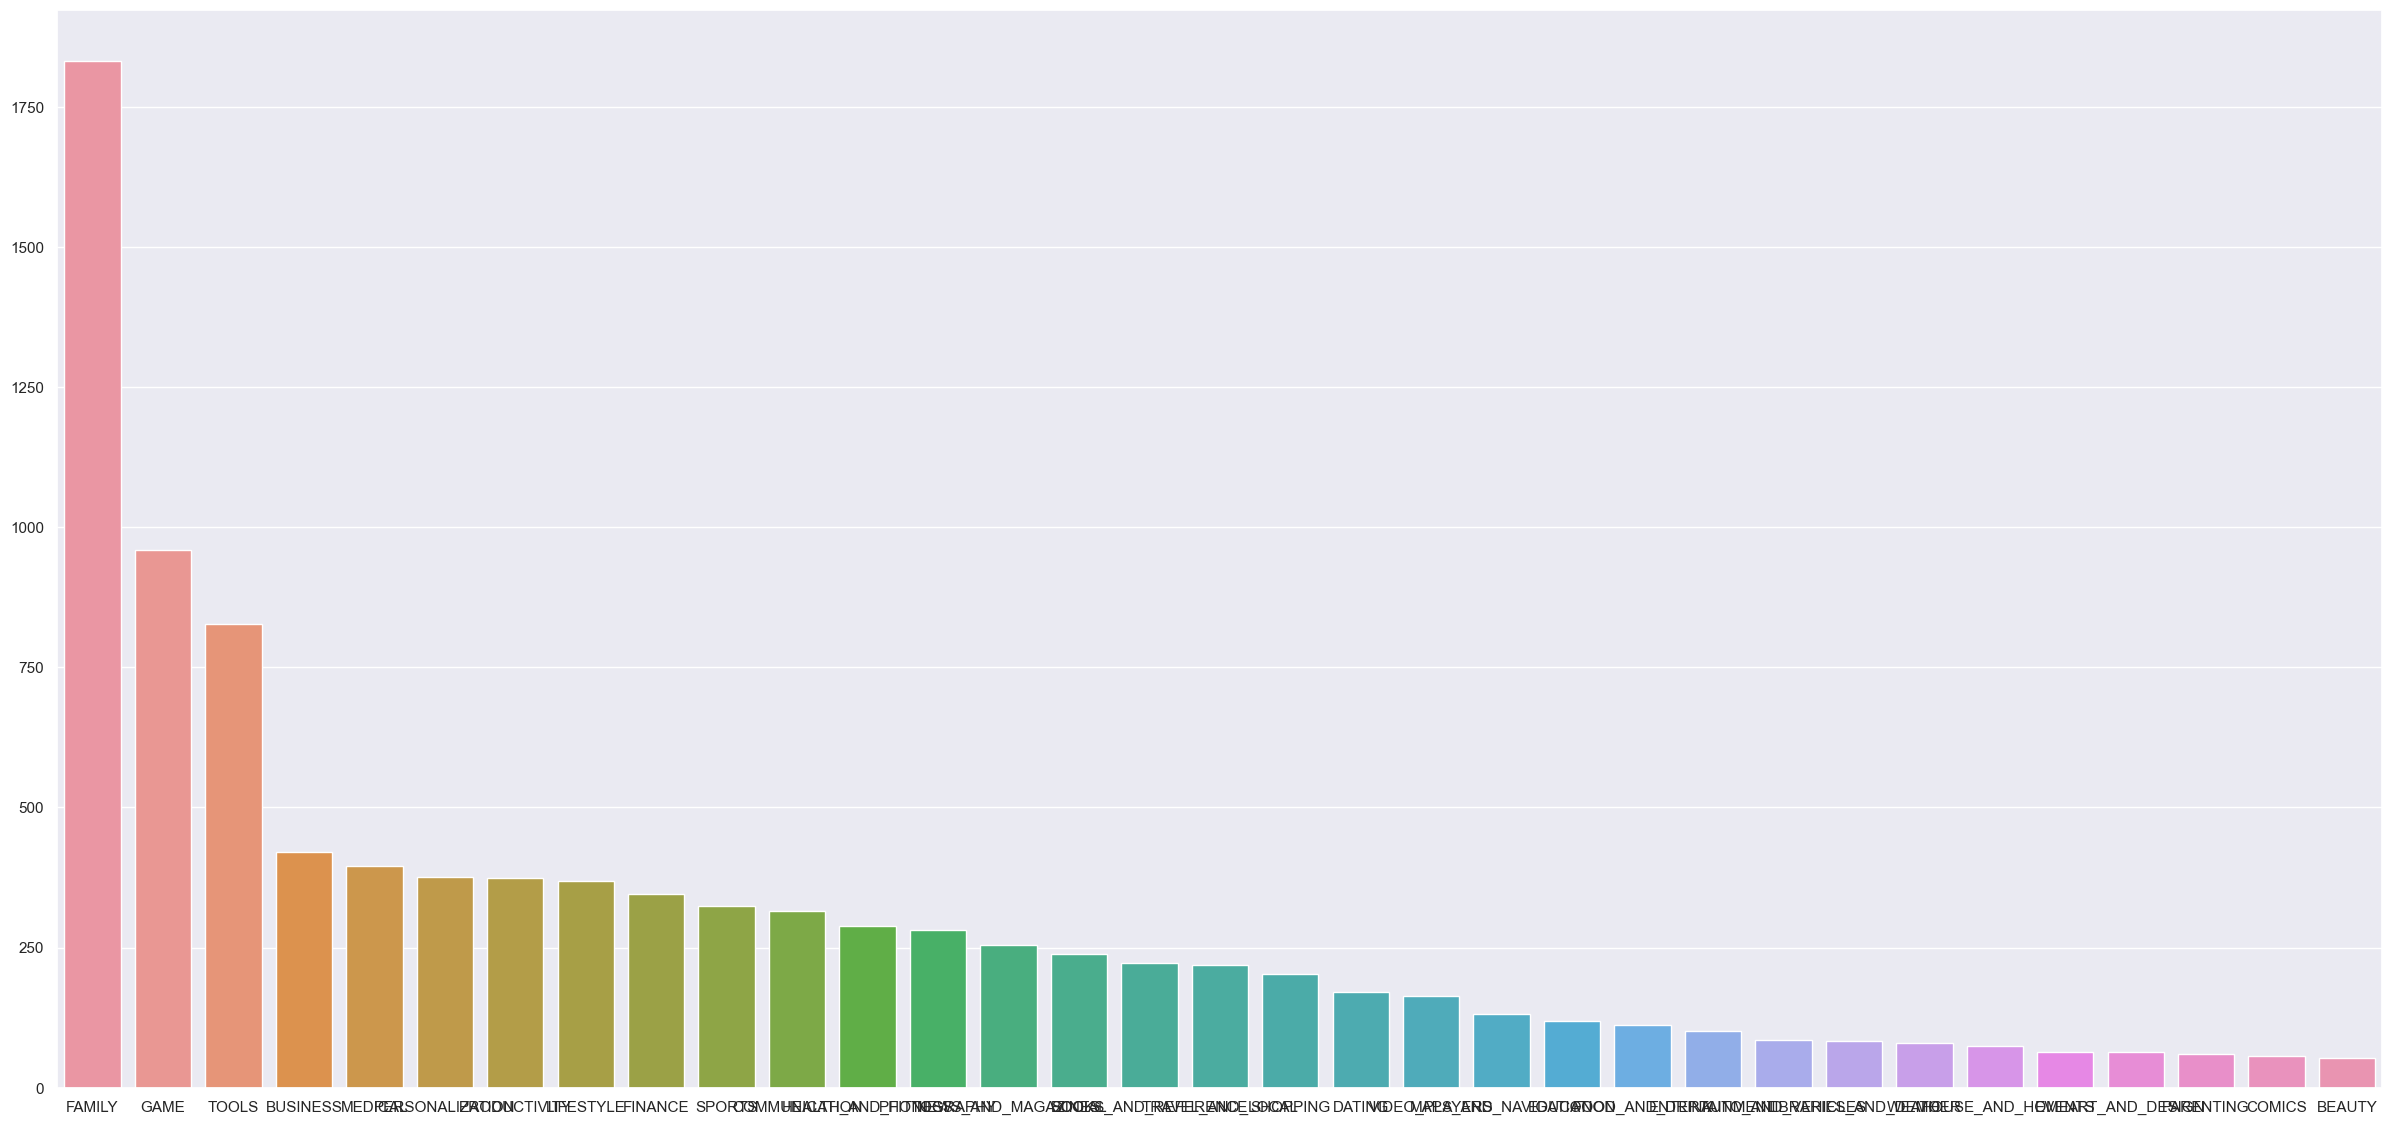

In [27]:
# Printing the total number of unique categories

num_categories = len(app['Category'].unique())
print('Number of categories = ', num_categories)



# Counting the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = app['Category'].value_counts().sort_values(ascending = False)


sns.set(rc={'figure.figsize':(30,14)})
sns.barplot(x = num_apps_in_category.index,y= num_apps_in_category.values,)
plt.show()

# 4. Distribution of App Ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [29]:
# Average rating of apps
avg_app_rating = app['Rating'].mean()
print('Average app rating = ', avg_app_rating)



Average app rating =  4.173243045387994


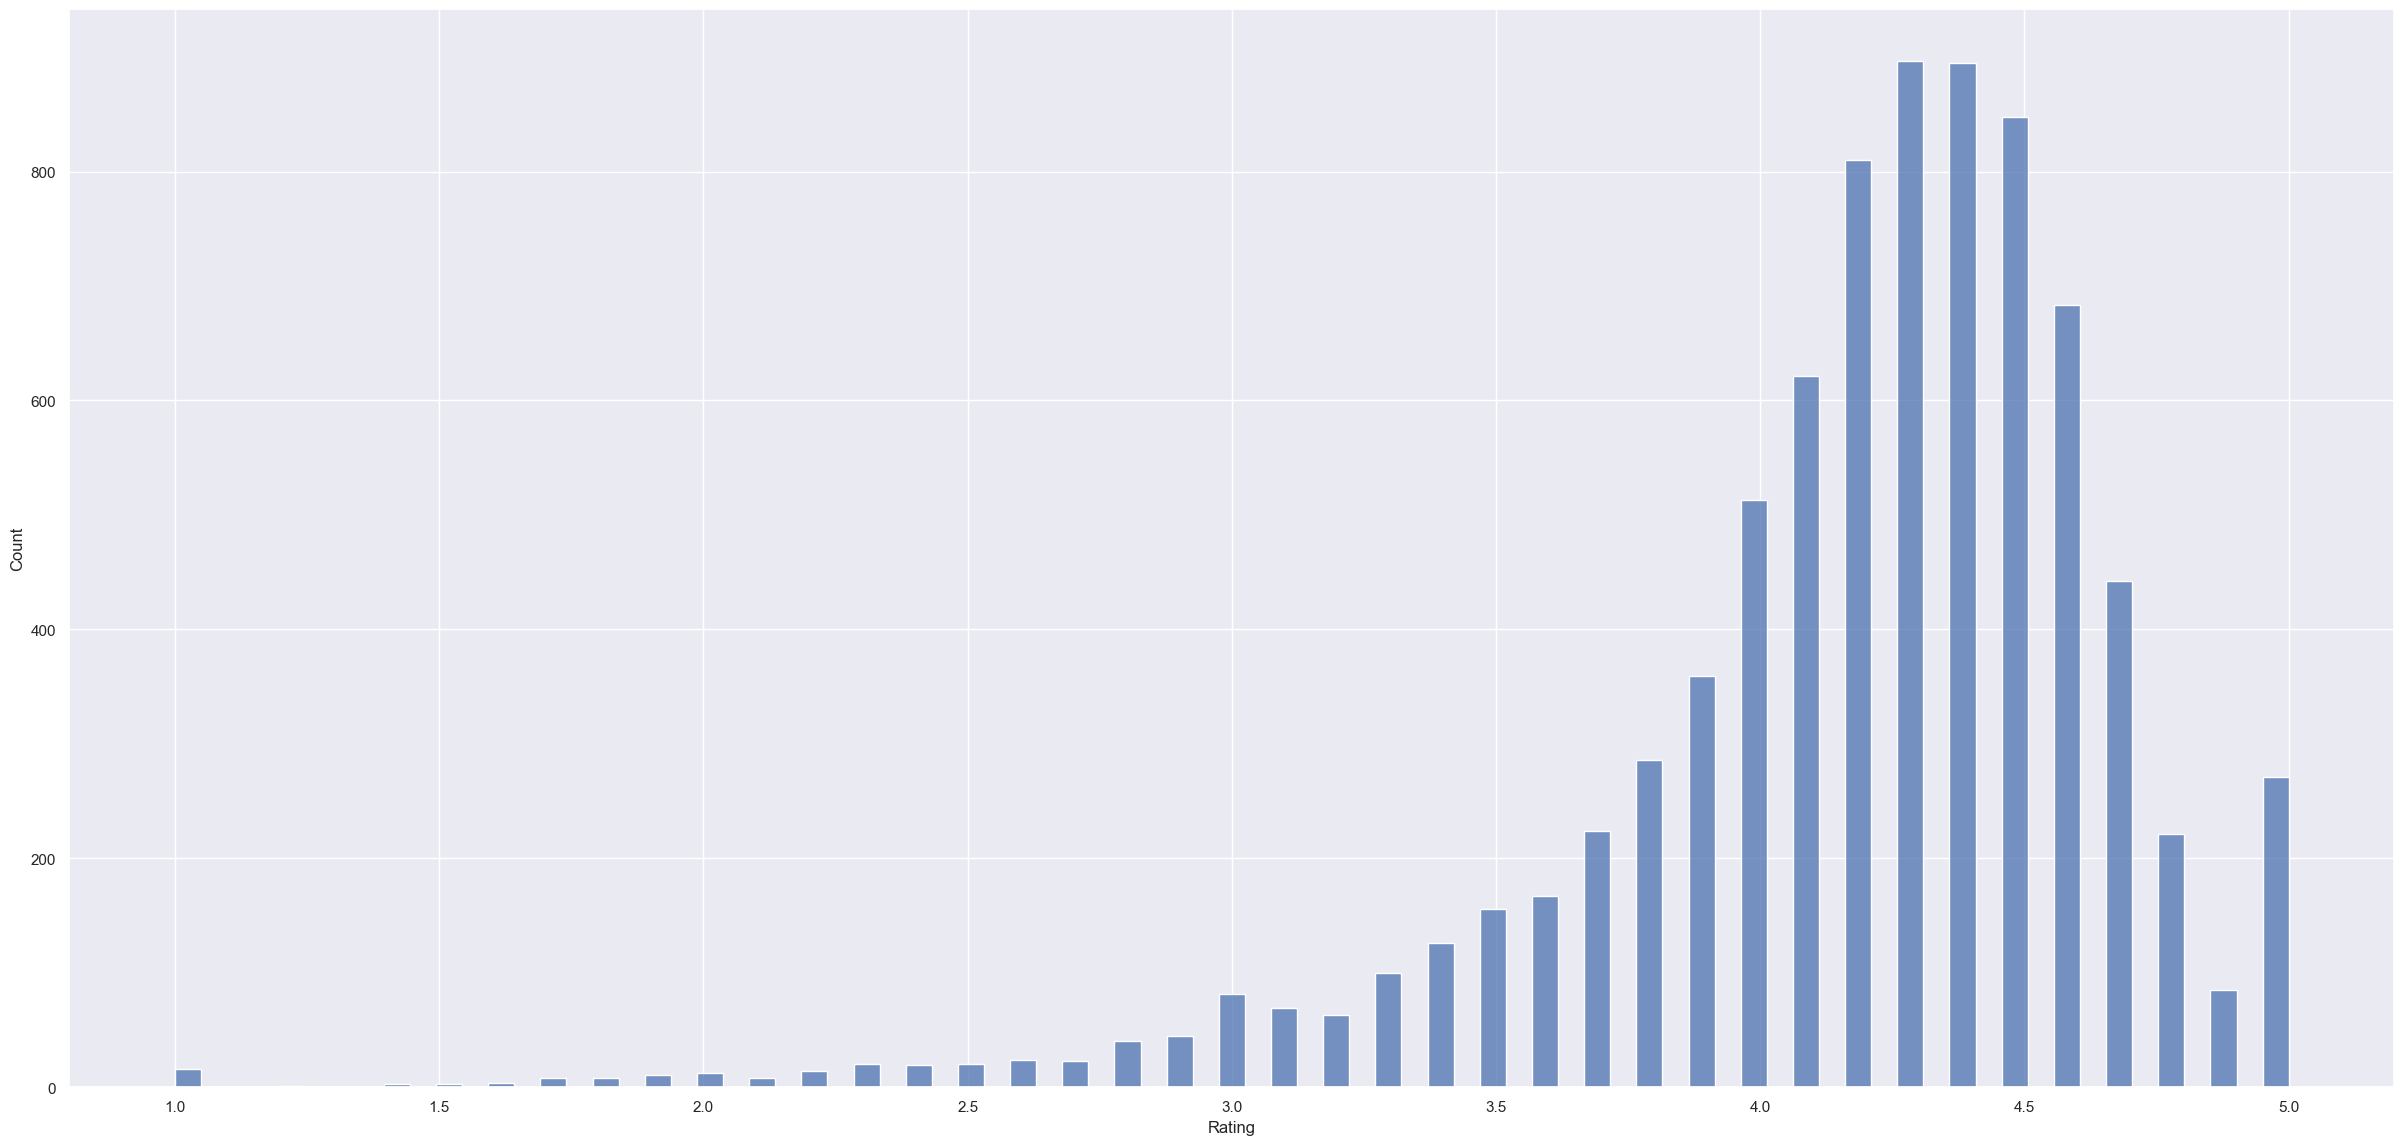

In [31]:
sns.histplot(data=app, x=app['Rating'])
plt.show()

# 5. Size and price of an app

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

Does the size of an app affect its rating?
Do users really care about system-heavy apps or do they prefer light-weighted apps?
Does the price of an app affect its rating?
Do users always prefer free apps over paid apps?
We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

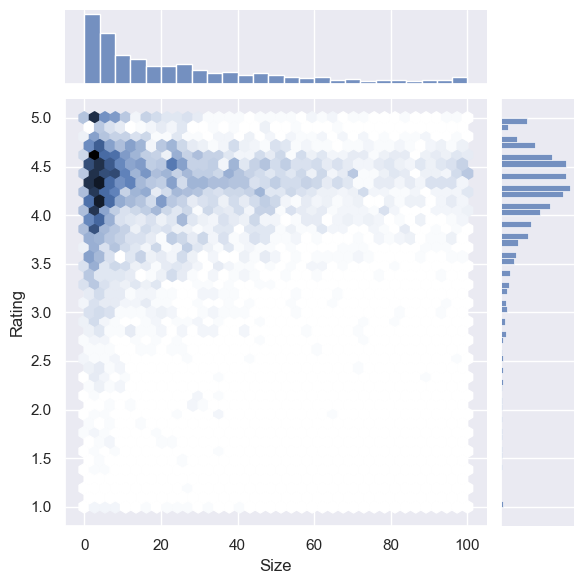

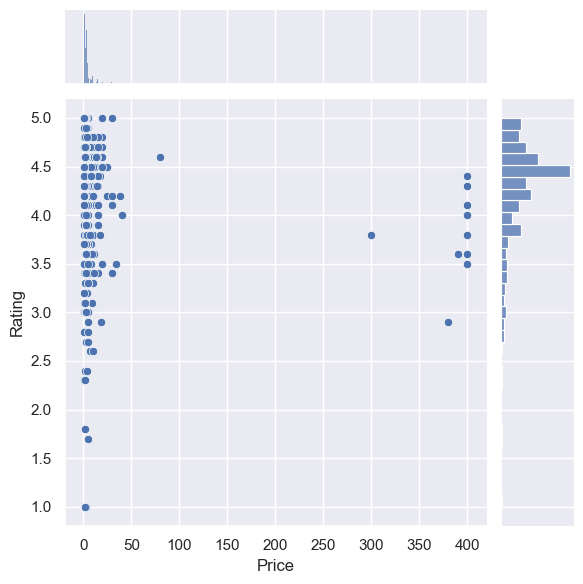

In [34]:
# Filtering rows where both Rating and Size values are not null
apps_with_size_and_rating_present = app[(~app['Rating'].isnull()) & (~app['Size'].isnull())]

# Subseting for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Ploting size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subseting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Ploting price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# 6. Relation between App Category and App Price

 So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! 


All games apps are priced below $20

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


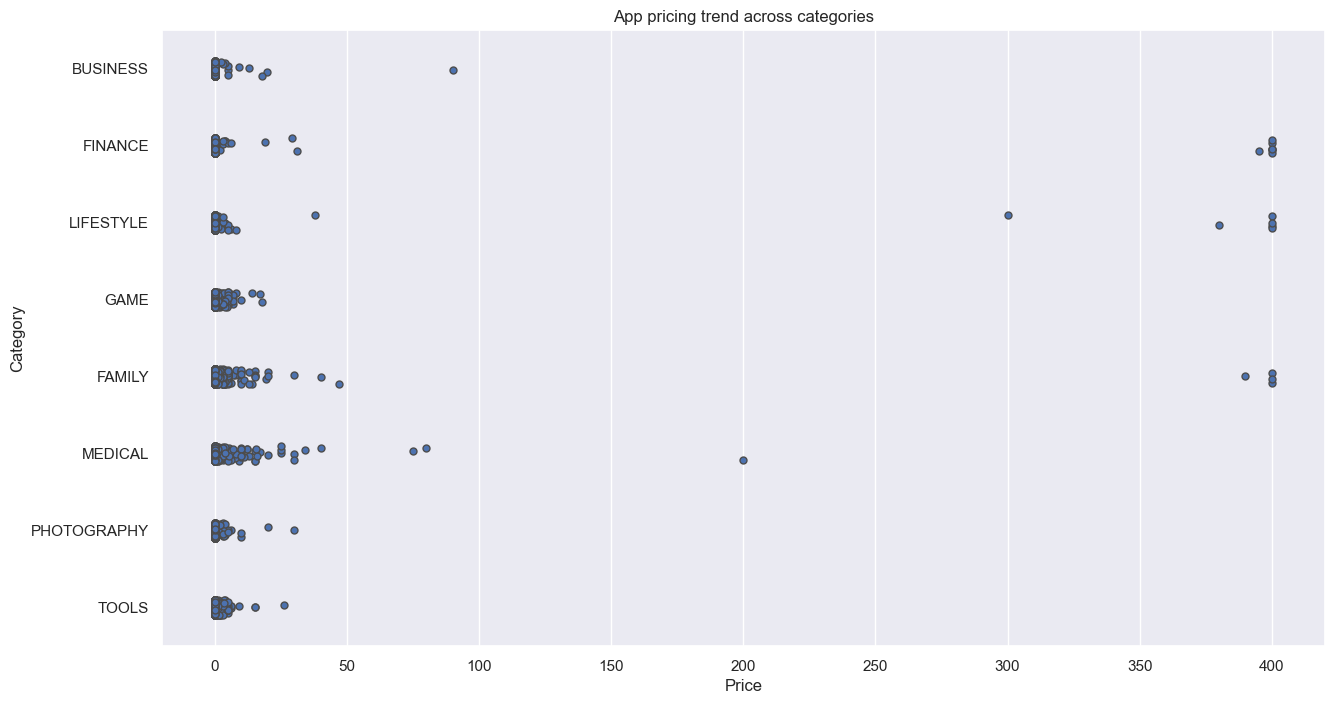

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = app[app.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

# 7. Filter out "junk" apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

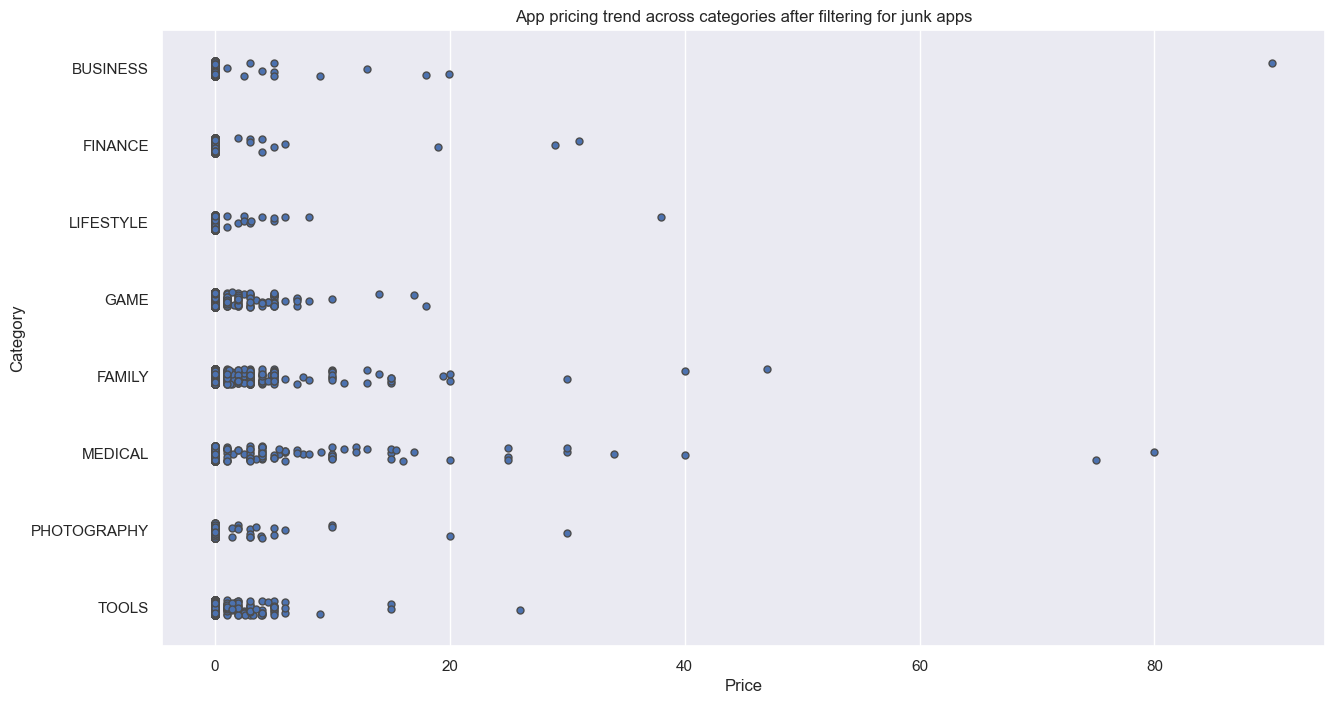

In [38]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]
apps_under_100 

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'], data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

#  8. Sentiment analysis of user reviews¶


Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

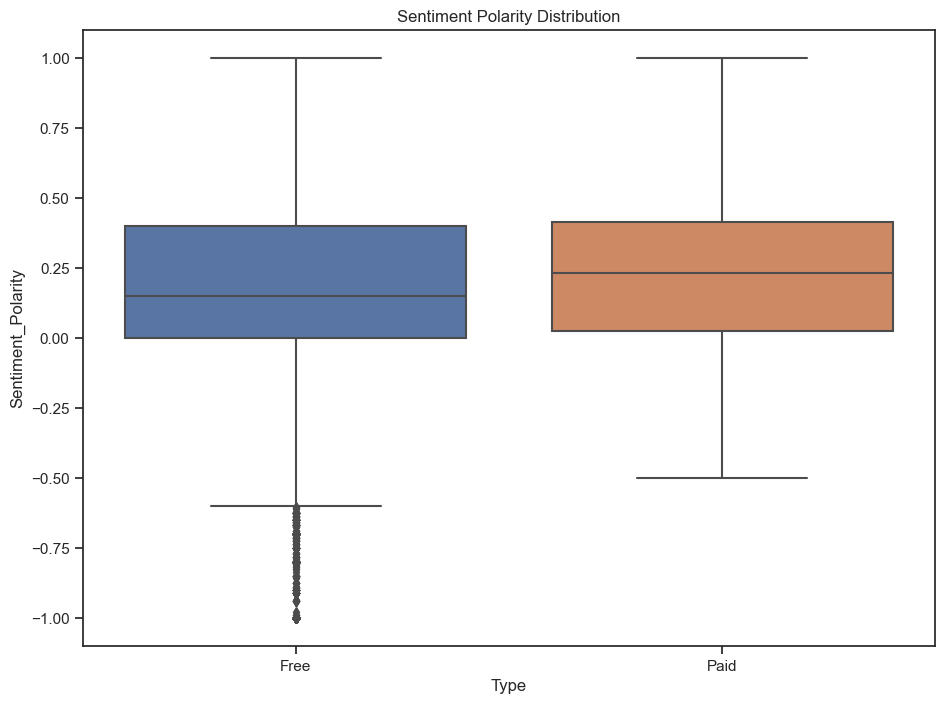

In [44]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Inner join and merge
merged_df = pd.merge(app, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data=merged_df)
ax.set_title('Sentiment Polarity Distribution')